In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier, XGBRegressor
import scipy.stats as stats
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

### Problem 1: Difference in Groups

Below, data for an experimental curricular intervention is given for the treatment and control group.  Explain how you can use `stats.ttest_ind` to determine if the intervention made a difference.  Test the hypothesis that the groups average score on the Directed Reading Protocol assessment (`drp` column) are different. 

In [4]:
drp = pd.read_csv('data/DRP.csv', index_col=0)

In [5]:
drp.head()

group  g  drp
id               
1   Treat  0   24
2   Treat  0   56
3   Treat  0   43
4   Treat  0   59
5   Treat  0   58

#### Problem 2: Effect Size

While the hypothesis test determines whether or not the groups results are different, it doesn't say just how big of a difference this significance determines.  For this, we turn to **effect size**.  Here is an article discussing why $p$-values might not be enough when determining the difference between groups. [[link](https://pmc.ncbi.nlm.nih.gov/articles/PMC3444174/) ] Can you use any of the ideas discussed to determine the effect size or power of the intervention? (Feel free to use any library including `statsmodels`)

In [22]:
import statsmodels.stats.power as smp

#### Problem 3: Regression and Interpreting Coefficients

Below, our wage dataset from an earlier assignment is loaded and displayed.  Consider using the `XGBRegressor` to build a model predicting wages.  Tune the model so its performance is as consistent as you can get, and use `sklearn.inspection` to explore the most important features driving wages.

In [23]:
from sklearn.datasets import fetch_openml

In [24]:
wages = fetch_openml(data_id=534, as_frame=True).frame

In [25]:
wages.head()

EDUCATION SOUTH     SEX  ...  OCCUPATION         SECTOR       MARR
0          8    no  female  ...       Other  Manufacturing    Married
1          9    no  female  ...       Other  Manufacturing    Married
2         12    no    male  ...       Other  Manufacturing  Unmarried
3         12    no    male  ...       Other          Other  Unmarried
4         12    no    male  ...       Other          Other    Married

[5 rows x 11 columns]

In [26]:
wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    int64   
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    int64   
 4   UNION       534 non-null    category
 5   WAGE        534 non-null    float64 
 6   AGE         534 non-null    int64   
 7   RACE        534 non-null    category
 8   OCCUPATION  534 non-null    category
 9   SECTOR      534 non-null    category
 10  MARR        534 non-null    category
dtypes: category(7), float64(1), int64(3)
memory usage: 21.4 KB


#### Problem 4: Classical Regression Inference

Repeat the above problem but this time build your model using `statsmodels` regression model ([docs]()).  After fitting, explore the summary and the hypothesis tests for each coefficient as well as the confidence intervals.  Do you find similar results as using the `inspection` module?  Compare and contrast these approaches to understanding your models performance.

In [31]:
import statsmodels.api as sm

In [32]:
sm.OLS?

Init signature: sm.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
Docstring:     
Ordinary Least Squares

Parameters
----------
endog : array_like
    A 1-d endogenous response variable. The dependent variable.
exog : array_like
    A nobs x k array where `nobs` is the number of observations and `k`
    is the number of regressors. An intercept is not included by default
    and should be added by the user. See
    :func:`statsmodels.tools.add_constant`.
missing : str
    Available options are 'none', 'drop', and 'raise'. If 'none', no nan
    checking is done. If 'drop', any observations with nans are dropped.
    If 'raise', an error is raised. Default is 'none'.
hasconst : None or bool
    Indicates whether the RHS includes a user-supplied constant. If True,
    a constant is not checked for and k_constant is set to 1 and all
    result statistics are calculated as if a constant is present. If
    False, a constant is not checked for and k_constant is set to 0.
**kwa

#### Problem 5: Causal ML

Watch Hajime Takeda's talk from Scipy 2024 on Casaul ML.  What is the big idea and can you explain a use case for Causal ML?

In [27]:
from IPython.display import YouTubeVideo

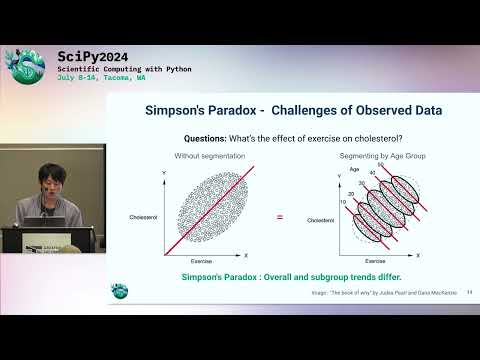

In [28]:
YouTubeVideo(id = 'xcv4FH-KnvA')

#### Problem 6: `EconML`

Microsoft has put together a very nice library with popular Causal ML algorithms and analysis tools.  Head over to the [Econ ML website](https://www.microsoft.com/en-us/research/project/econml/) and read through the [Trip Advisor Case Study](https://www.microsoft.com/en-us/research/wp-content/uploads/2020/04/MSR_ALICE_casestudy_2020.pdf).  Your goal is to use these ideas to determine a targeting strategy for the hillstrom data loaded below. ([Explanation of problem here](https://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html))  This is a fairly open ended task, and you have flexibility with determining exactly how you want to approach this.  I will give you time on Tuesday to brainstorm ideas with peers in class, and together you should produce a brief summary of your strategy and its efficacy.

In [29]:
from sklift.datasets import fetch_hillstrom

In [30]:
dataset = fetch_hillstrom(target_col='conversion')
data, target, treatment = dataset.data, dataset.target, dataset.treatment